In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the books page
url = 'https://books.toscrape.com/'

# Send a GET request to the page
response = requests.get(url)

# Check if the request is successful
if response.status_code == 200:
    print("Request successful!")
else:
    print(f"Request failed with status code {response.status_code}")

# Parse the HTML content of the page
soup = BeautifulSoup(response.text, 'html.parser')

# Find all product containers (each book is within a 'article' tag)
books = soup.find_all('article', {'class': 'product_pod'})

# Check if any books were found
print(f"Found {len(books)} books.")

# List to store book data
book_data = []

for book in books:
    # Extract book title
    title = book.find('h3').find('a').get('title')
    
    # Extract book price
    price = book.find('p', {'class': 'price_color'}).get_text()
    
    # Extract book rating (convert to numeric if needed)
    rating = book.find('p', {'class': 'star-rating'}).get('class')[1]
    
    # Store the extracted data
    book_data.append({
        'Title': title,
        'Price': price,
        'Rating': rating
    })

# Check the collected data
print(f"Scraped {len(book_data)} books.")
print(book_data[:5])  # Print first 5 entries to verify

# Convert to DataFrame and save to CSV
df = pd.DataFrame(book_data)
df.to_csv('books_to_scrape.csv', index=False)

# Check if the CSV file was written
print("CSV file written successfully.")


Request successful!
Found 20 books.
Scraped 20 books.
[{'Title': 'A Light in the Attic', 'Price': 'Â£51.77', 'Rating': 'Three'}, {'Title': 'Tipping the Velvet', 'Price': 'Â£53.74', 'Rating': 'One'}, {'Title': 'Soumission', 'Price': 'Â£50.10', 'Rating': 'One'}, {'Title': 'Sharp Objects', 'Price': 'Â£47.82', 'Rating': 'Four'}, {'Title': 'Sapiens: A Brief History of Humankind', 'Price': 'Â£54.23', 'Rating': 'Five'}]
CSV file written successfully.


First 5 rows of the data:
                                   Title    Price Rating
0                   A Light in the Attic  Â£51.77  Three
1                     Tipping the Velvet  Â£53.74    One
2                             Soumission  Â£50.10    One
3                          Sharp Objects  Â£47.82   Four
4  Sapiens: A Brief History of Humankind  Â£54.23   Five
                                   Title  Price Rating
0                   A Light in the Attic  51.77  Three
1                     Tipping the Velvet  53.74    One
2                             Soumission  50.10    One
3                          Sharp Objects  47.82   Four
4  Sapiens: A Brief History of Humankind  54.23   Five


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


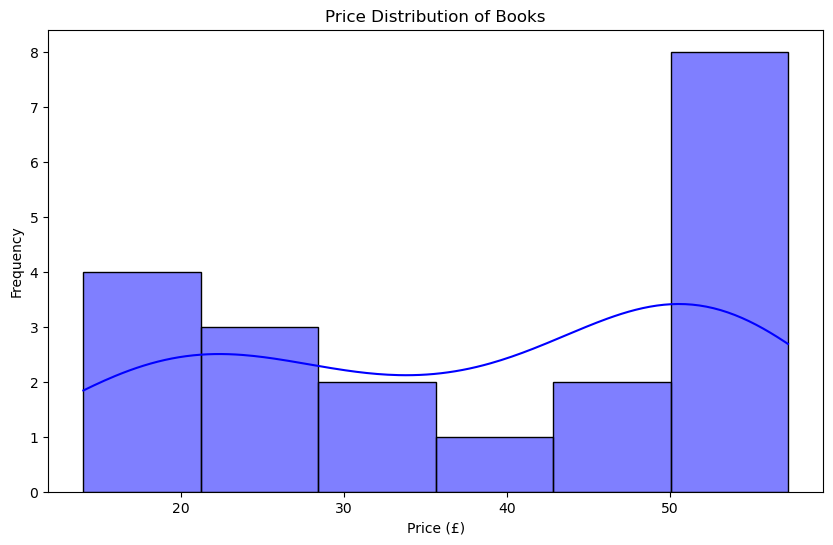

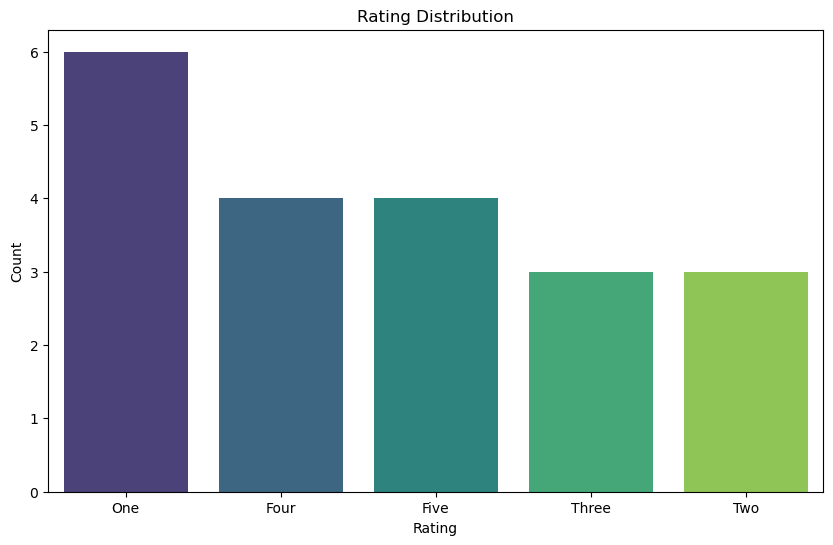

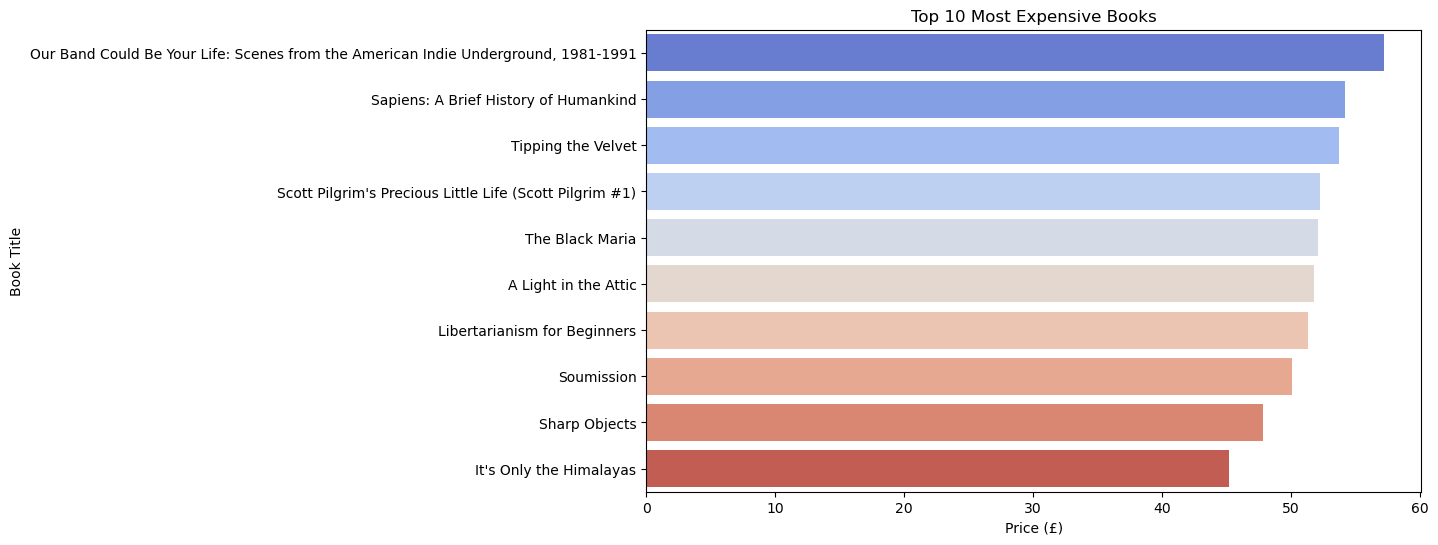

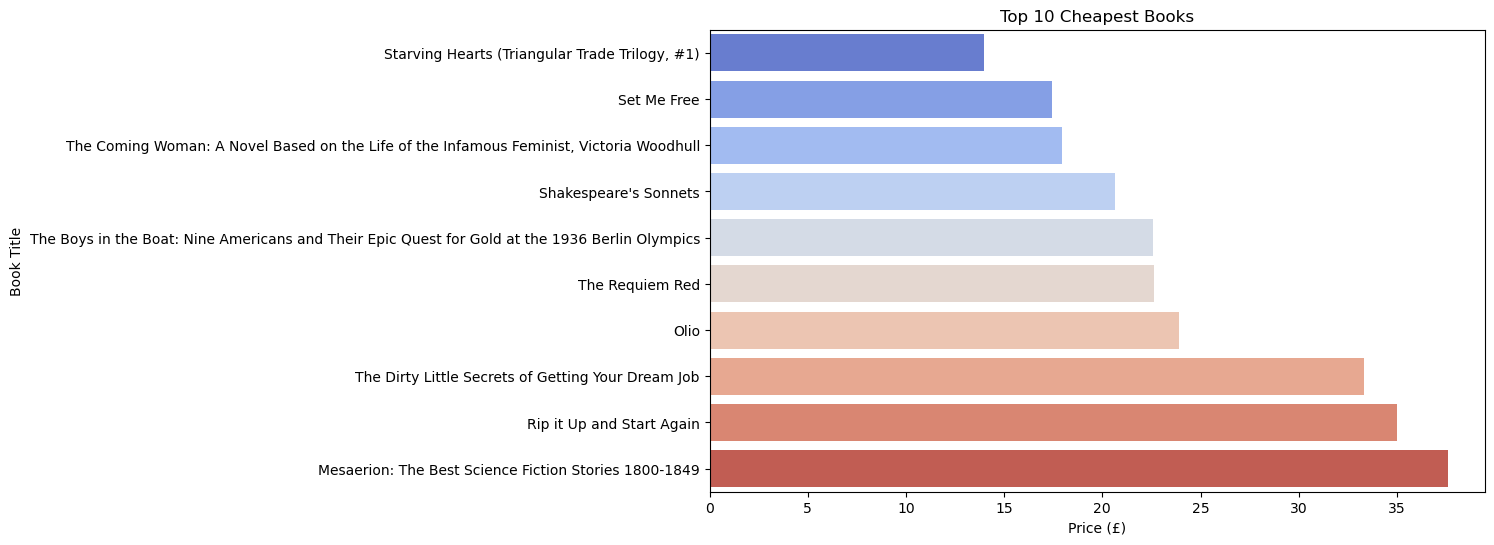

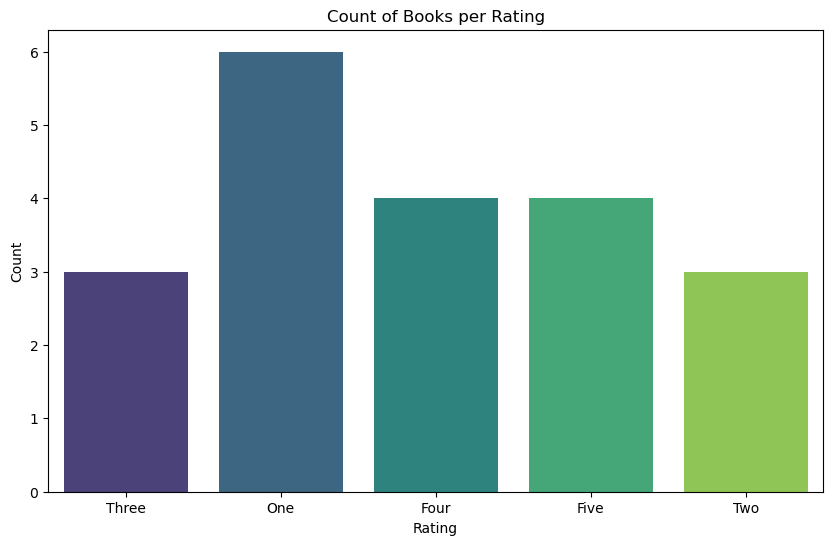

In [10]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the scraped data
df = pd.read_csv('books_to_scrape.csv')

# Display the first few rows of the data to check the content
print("First 5 rows of the data:")
print(df.head())

# Clean the 'Price' column by removing the '£' symbol and converting it to float
# Clean the 'Price' column by removing 'Â' and '£' symbols and converting to float
df['Price'] = df['Price'].replace({'Â': '', '£': '', ',': ''}, regex=True).astype(float)

# Check the cleaned data
print(df.head())


# -------------------------
# 1. Price Distribution
# -------------------------
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, color='blue')
plt.title('Price Distribution of Books')
plt.xlabel('Price (£)')
plt.ylabel('Frequency')
plt.show()

# -------------------------
# 2. Rating Distribution
# -------------------------
rating_counts = df['Rating'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# -------------------------
# 3. Top 10 Most Expensive Books
# -------------------------
top_10_expensive_books = df.nlargest(10, 'Price')

plt.figure(figsize=(10, 6))
sns.barplot(x='Price', y='Title', data=top_10_expensive_books, palette='coolwarm')
plt.title('Top 10 Most Expensive Books')
plt.xlabel('Price (£)')
plt.ylabel('Book Title')
plt.show()

# -------------------------
# 4. Top 10 Cheapest Books
# -------------------------
top_10_cheapest_books = df.nsmallest(10, 'Price')

plt.figure(figsize=(10, 6))
sns.barplot(x='Price', y='Title', data=top_10_cheapest_books, palette='coolwarm')
plt.title('Top 10 Cheapest Books')
plt.xlabel('Price (£)')
plt.ylabel('Book Title')
plt.show()

# -------------------------
# 5. Count of Books per Rating
# -------------------------
rating_counts = df['Rating'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=df, palette='viridis')
plt.title('Count of Books per Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()
